In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from fun_gilles import *
colors = plt.get_cmap('Set2').colors
title_fs = 16
label_fs = 15
tick_fs = 14
legend_fs = 14

## Funciones

In [1]:
def plot(abundances, times, V):

    # --- Create the figure and a 1-row, 3-column subplot grid ---
    # Using a wide figsize for a horizontal layout.
    fig, axes = plt.subplots(nrows=1, ncols=2,sharey=False) 
    # Note: sharex=True is removed because we need the x-axis ticks on all three plots, 
    # although they are the same (time).

    # --- Subplot 1 (Left): Concentration ---
    ax1 = axes[0]
    for i in range(len(species)):
        # Calculate Concentration = Abundance / Volume
        ax1.plot(times, abundances[:, i] / V, label=species[i], color=colors[i], alpha=0.9)
    ax1.grid(True, linestyle='--', alpha=0.3)
    ax1.set_ylabel("Concentration", fontsize= label_fs)
    ax1.set_title("Time Evolution", fontsize= title_fs)

    # --- Subplot 2 (Middle): Volume ---
    ax2 = axes[1]
    ax2.plot(times, V, color='gray')
    ax2.grid(True, linestyle='--', alpha=0.3)
    ax2.set_xlabel("Time", fontsize= label_fs)
    ax2.set_ylabel("Volume", fontsize = label_fs)



    ax1.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize= legend_fs)



    plt.show()

In [2]:
def xyeq_vs_c_ar(initial_c, initial_food,method, n_iterations, 
              reactions, k, V0, k_var):
    equilibrium = np.zeros((len(initial_c)))
    colors = plt.cm.coolwarm(np.linspace(0, 1, len(k_var)))

    for j in range(len(k_var)):
        k[1] = k_var[j] 
        
        for i in range(len(initial_c)):
            initial_food[0] = initial_c[i]
            abundances, times, V = chemistry(method, n_iterations, f, 
                                        initial_food, k, V0)
            print(f"simulation completed for c = {i}")
            equilibrium[i] = abundances[-1, -1]/V0
        
        plt.plot(initial_c/V0, equilibrium, label="$k_{ar}$"+f"={k_var[j]:.1e}",
                color=colors[j], alpha=0.8)
            

    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xlabel("$[C]_0$",fontsize = label_fs)
    plt.ylabel("$[XY]_{eq}$",fontsize = label_fs)
    plt.tick_params(axis='both', labelsize= tick_fs)
    plt.legend(fontsize= legend_fs,loc='center left', bbox_to_anchor=(1.05, 0.5))
        
    plt.show()

In [3]:
def xyeq_vs_c_br(initial_c, initial_food,method, n_iterations, 
              reactions, k, V0, k_var):
    equilibrium = np.zeros((len(initial_c)))
    colors = plt.cm.coolwarm(np.linspace(0, 1, len(k_var)))

    for j in range(len(k_var)):
        k[3] = k_var[j] 
        V = V0
        for i in range(len(initial_c)):
            initial_food[0] = initial_c[i]
            abundances, times, V = chemistry(method, n_iterations, f, 
                                        initial_food, k, V0)
            equilibrium[i] = abundances[-1, -1]/V0
        
        plt.plot(initial_c/V0, equilibrium, label="$k_{br}$"+f"={k_var[j]:.1e}",
                color=colors[j], alpha=0.8)
            

    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xlabel("$[C]_0$",fontsize = label_fs)
    plt.ylabel("$[XY]_{eq}$",fontsize = label_fs)    
    plt.tick_params(axis='both', labelsize= tick_fs)


    plt.legend(fontsize = legend_fs,loc='center left', bbox_to_anchor=(1.05, 0.5))
        
    plt.show()

In [4]:
def xyeq_vs_k_ar(initial_c, initial_food,method, n_iterations, 
                 reactions, k, V, k_var):
    equilibrium = np.zeros((len(k_var)))
    colors = plt.cm.coolwarm(np.linspace(0, 1, len(initial_c)))

        
    for i in range(len(initial_c)):
        initial_food[0] = initial_c[i]
        
        for j in range(len(k_var)):
            k[1] = k_var[j]
            abundances, times, V = chemistry(method, n_iterations, f, 
                                        initial_food, k, V)
            equilibrium[j] = abundances[-1, -1]/V
        
        plt.plot(k_var, equilibrium, label="$C_0$"+f"={initial_c[i]}",
                color=colors[i], alpha=0.8)
        
    plt.xscale("log")
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xlabel("$k_{ar}$",fontsize = label_fs)
    plt.ylabel("$[XY]_{eq}$",fontsize = label_fs)
    plt.tick_params(axis='both', labelsize= tick_fs)

    plt.legend(fontsize = legend_fs,loc='center left', bbox_to_anchor=(1.05, 0.5))
        
    plt.show()

def xyeq_vs_k_br(initial_c, initial_food, method, n_iterations, 
                 reactions, k, V, k_var):
    equilibrium = np.zeros((len(k_var)))
    colors = plt.cm.coolwarm(np.linspace(0, 1, len(initial_c)))

        
    for i in range(len(initial_c)):
        initial_food[0] = initial_c[i]
        
        for j in range(len(k_var)):
            k[3] = k_var[j]
            abundances, times, V = chemistry(method, n_iterations, f, 
                                            initial_food, k, V)
            equilibrium[j] = abundances[-1, -1]/V
        
        plt.plot(k_var, equilibrium, label="$C_0$"+f"={initial_c[i]}",
                color=colors[i], alpha=0.8)
        
    plt.xscale("log")
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xlabel("$k_{br}$",fontsize = label_fs)
    plt.ylabel("$[XY]_{eq}$",fontsize = label_fs)
    plt.legend(fontsize = legend_fs,loc='center left', bbox_to_anchor=(1.05, 0.5))
    plt.tick_params(axis='both', labelsize= tick_fs)
       
    plt.show()

def time_evolution(method, n_iterations, reactions, initial_food, k, V):
    species = obtain_species(reactions)
    abundances, times, V = chemistry(method, n_iterations, f, initial_food,
                                     k, V)

    # Representation
    plt.figure()
    colors = plt.cm.coolwarm(np.linspace(0, 1, len(species)))
    plt.grid()

    for i in range(len(species)):
        plt.plot(times, abundances[:, i], label=species[i], color=colors[i], alpha=0.9)

    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xlabel("Time")
    plt.ylabel("Abundances")
    plt.legend()
    plt.title(f"{method} time evolution: k= {k}")
        
    print(f"Parameters used for simulation:\n\
    Initial abundances:\nX_0={initial_food[1]}\nY_0={initial_food[2]}\n\
    C_0={initial_food[0]}\n\
    k_a = {k[0]}; k_a_r = {k[1]}\n\
    k_b= {k[2]}, k_b_r={k[3]}\n\
    # iterations = {n_iterations}")

    plt.show()
    
def time_evolution_concentration(method, n_iterations, reactions, initial_food, k, V):
    species = obtain_species(reactions)
    abundances, times, V = chemistry(method, n_iterations, f, initial_food,
                                     k, V)

    # Representation
    plt.figure()
    colors = plt.cm.coolwarm(np.linspace(0, 1, len(species)))
    plt.grid()

    for i in range(len(species)):
        plt.plot(times, abundances[:, i]/V, label=species[i], color=colors[i], alpha=0.9)

    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xlabel("Time")
    plt.ylabel("Concentrations")
    plt.legend()
    plt.title(f"{method} time evolution: k= {k}")
        
    print(f"Parameters used for simulation:\n\
    Initial abundances:\nX_0={initial_food[1]}\nY_0={initial_food[2]}\n\
    C_0={initial_food[0]}\n\
    k_a = {k[0]}; k_a_r = {k[1]}\n\
    k_b= {k[2]}, k_b_r={k[3]}\n\
    # iterations = {n_iterations}")

    plt.show()

In [5]:
f = "../examples/reactions_XYC.txt" # M reactions
method = "Deterministic" # Gillespie or Deterministic

# obtener reacciones y especies:
reactions = read_file(f)
species = obtain_species(reactions)

NameError: name 'read_file' is not defined

# Analítico

In [13]:
initial_c = [1000]*3+[0]*2
k = [1]*4
iterations = 20000
V = 1
method = "Gillespie"
abundances, times, V = chemistry(method, iterations, f, initial_c, k, V)


import pickle
output_file = "xyc_gillespie.pkl"
try: 
    with open(output_file, "ab") as file:
        pickle.dump((abundances, times, V), file)
        file.flush()
except Exception as e:
    print(f"An error has occured: {e}")

finally: 
    print("Simulation run completed")


Criterion for stop was # of iterations
Simulation run completed


Parameters used for simulation:
Initial abundances:
X_0=1000
Y_0=1000
C_0=1000
k_a = 1; k_a_r = 1
k_b= 1, k_b_r=1
# iterations = 20000


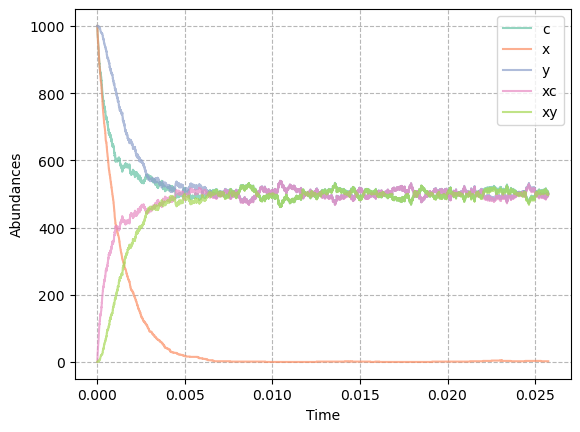

In [9]:
plt.figure()
colors = plt.get_cmap('Set2').colors
plt.grid()

for i in range(len(species)):
    plt.plot(times, abundances[:, i], label=species[i], color=colors[i], alpha=0.7)

plt.grid(True, linestyle='--', alpha=0.9)
plt.xlabel("Time")
plt.ylabel("Abundances")
plt.legend()
    
print(f"Parameters used for simulation:\n\
Initial abundances:\nX_0={initial_c[1]}\nY_0={initial_c[2]}\n\
C_0={initial_c[0]}\n\
k_a = {k[0]}; k_a_r = {k[1]}\n\
k_b= {k[2]}, k_b_r={k[3]}\n\
# iterations = {iterations}")

plt.show()

Simulation run completed
Parameters used for simulation:
Initial abundances:
X_0=1000
Y_0=1000
C_0=1000
k_a = 1; k_a_r = 1
k_b= 1, k_b_r=1
# iterations = 0.025


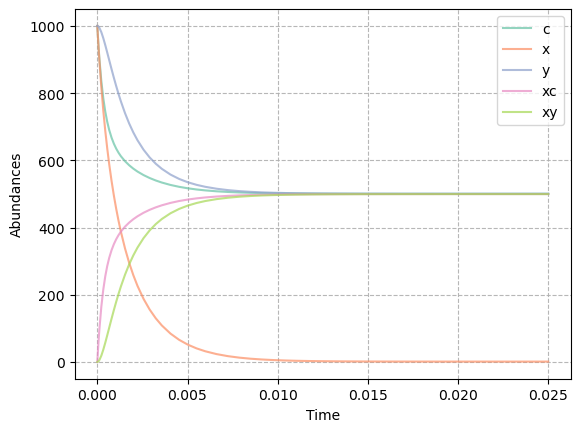

In [9]:
initial_c = [1000]*3+[0]*2
k = [1]*4
iterations = 0.025
V = 1
method = "Deterministic"
abundances, times, V = chemistry(method, iterations, f, initial_c, k, V)

import pickle
output_file = "xyc_deterministic.pkl"
try: 
    with open(output_file, "ab") as file:
        pickle.dump((abundances, times, V), file)
        file.flush()
except Exception as e:
    print(f"An error has occured: {e}")

finally: 
    print("Simulation run completed")

plt.figure()
colors = plt.get_cmap('Set2').colors
plt.grid()

for i in range(len(species)):
    plt.plot(times, abundances[:, i], label=species[i], color=colors[i], alpha=0.7)

plt.grid(True, linestyle='--', alpha=0.9)
plt.xlabel("Time")
plt.ylabel("Abundances")
plt.legend()
    
print(f"Parameters used for simulation:\n\
Initial abundances:\nX_0={initial_c[1]}\nY_0={initial_c[2]}\n\
C_0={initial_c[0]}\n\
k_a = {k[0]}; k_a_r = {k[1]}\n\
k_b= {k[2]}, k_b_r={k[3]}\n\
# iterations = {iterations}")

plt.show()

In [37]:
initial_c = [100]+[1000]*2+[0]*2
k = [1]*4
iterations = 20000
V = 1
method = "Gillespie"
abundances, times, V = chemistry(method, iterations, f, initial_c, k, V)

Criterion for stop was # of iterations


Parameters used for simulation:
Initial abundances:
X_0=1000
Y_0=1000
C_0=100
k_a = 1; k_a_r = 1
k_b= 1, k_b_r=1
# iterations = 20000


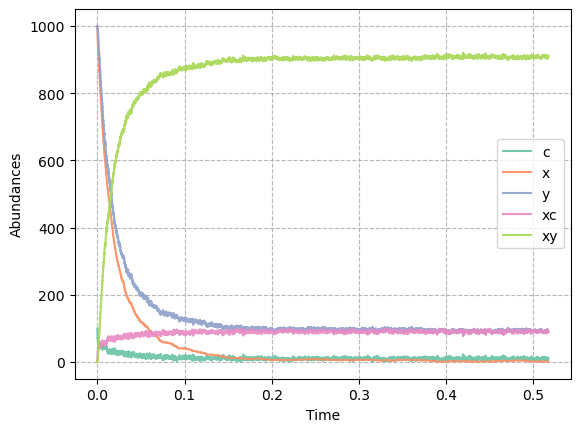

In [39]:
plt.figure()
colors = plt.get_cmap('Set2').colors
plt.grid()

for i in range(len(species)):
    plt.plot(times, abundances[:, i], label=species[i], color=colors[i], alpha=0.9)

plt.grid(True, linestyle='--', alpha=0.9)
plt.xlabel("Time")
plt.ylabel("Abundances")
plt.legend()
    
print(f"Parameters used for simulation:\n\
Initial abundances:\nX_0={initial_c[1]}\nY_0={initial_c[2]}\n\
C_0={initial_c[0]}\n\
k_a = {k[0]}; k_a_r = {k[1]}\n\
k_b= {k[2]}, k_b_r={k[3]}\n\
# iterations = {iterations}")

plt.show()

In [13]:
print(abundances[-5:,:])

[[ 12.   4.  92.  88. 908.]
 [ 11.   4.  93.  89. 907.]
 [ 10.   4.  94.  90. 906.]
 [  9.   4.  95.  91. 905.]
 [ 10.   4.  94.  90. 906.]]


## analítico XY

In [14]:
kinetic_k = [1,1]
initial_conditions = [1000,1000,0]
vol = 1
file_XY = "../examples/reactions_XY.txt"

ab, tim, vols = chemistry(method= "Gillespie",
                          iterations= int(1500),
                          file= file_XY,
                          initial_food= initial_conditions,
                          k= kinetic_k,
                          V= vol                          
                          )

Criterion for stop was # of iterations


['x' 'y' 'xy']


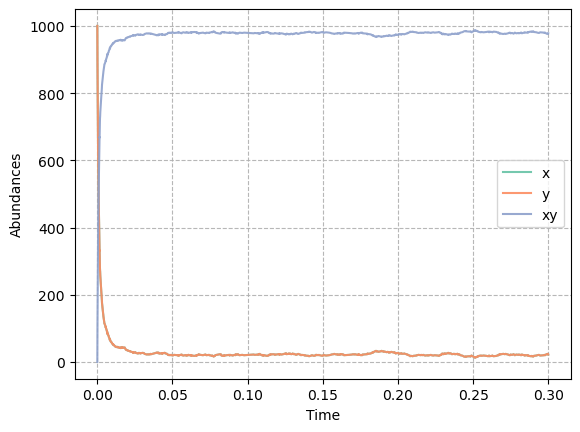

: 

In [ ]:
plt.figure()
colors = plt.get_cmap('Set2').colors
plt.grid()
species_XY = obtain_species(read_file(file_XY))
print(species_XY)
for i in range(len(species_XY)):
    
    plt.plot(tim, ab[:, i], label=species_XY[i], color=colors[i], alpha=0.9)

plt.grid(True, linestyle='--', alpha=0.9)
plt.xlabel("Time")
plt.ylabel("Abundances")
plt.legend()

# Modificaciones en $k_{ar}$

Remarkably, the performance of these perfect enzymes is limited by diffusion, as indicated by the values of their second order rate constant (kcat/Km) which are comparable to the rate constant for the diffusional encounter of spherical particles, i.e. 1010 M−1s−1.

https://www.sciencedirect.com/science/article/pii/S0006291X25001500

## Con $k_{br}=0$

In [8]:
f = "../examples/reactions_XYC.txt" # M reactions
method = "Deterministic" # Gillespie or Deterministic

# obtener reacciones y especies:
reactions = read_file(f)
species = obtain_species(reactions)

simulation completed for c = 0
simulation completed for c = 1
simulation completed for c = 2
simulation completed for c = 3
simulation completed for c = 4
simulation completed for c = 5
simulation completed for c = 6
simulation completed for c = 7
simulation completed for c = 8
simulation completed for c = 9
simulation completed for c = 10
simulation completed for c = 11
simulation completed for c = 12
simulation completed for c = 13
simulation completed for c = 14
simulation completed for c = 15
simulation completed for c = 16
simulation completed for c = 17
simulation completed for c = 18
simulation completed for c = 19
simulation completed for c = 20
simulation completed for c = 21
simulation completed for c = 22
simulation completed for c = 23
simulation completed for c = 24
simulation completed for c = 25
simulation completed for c = 26
simulation completed for c = 27
simulation completed for c = 28
simulation completed for c = 29
simulation completed for c = 30
simulation complet

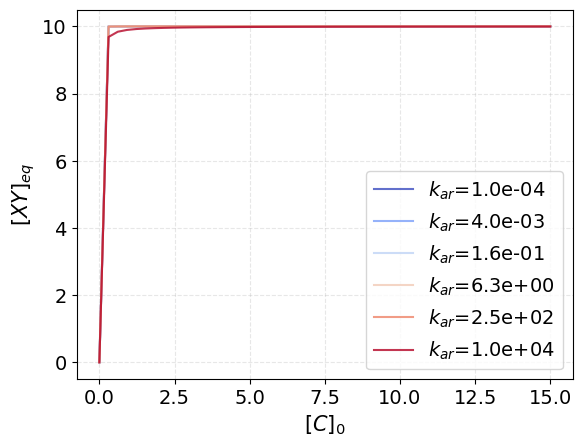

Parameters used for simulation:
Initial concentrations:
X_0=10
Y_0=10
k_a = 1; k_a_r = [1.00000000e-04 3.98107171e-03 1.58489319e-01 6.30957344e+00
 2.51188643e+02 1.00000000e+04]
k_b= 1, k_b_r=0
# iterations = 100000


In [12]:
# Reaction constants:
k = [1,0,1,0] # len(k)= # de reacciones
# Volume:
V = 1
initial_food = [0,10,10]+ [0]*2 # initial molecules number
initial_c = (np.linspace(0,15,50))
k_var = np.logspace(-4, 4, 6)
n_iterations = 100000

xyeq_vs_c_ar(initial_c, initial_food, method, n_iterations, f,
          k, V, k_var)

print(f"Parameters used for simulation:\n\
Initial concentrations:\nX_0={initial_food[1]}\nY_0={initial_food[2]}\n\
k_a = {k[0]}; k_a_r = {k_var}\n\
k_b= {k[2]}, k_b_r={k[3]}\n\
# iterations = {n_iterations}")

simulation completed for c = 0
simulation completed for c = 1
simulation completed for c = 2
simulation completed for c = 3
simulation completed for c = 4
simulation completed for c = 5
simulation completed for c = 6
simulation completed for c = 7
simulation completed for c = 8
simulation completed for c = 9
simulation completed for c = 10
simulation completed for c = 11
simulation completed for c = 12
simulation completed for c = 13
simulation completed for c = 14
simulation completed for c = 15
simulation completed for c = 16
simulation completed for c = 17
simulation completed for c = 18
simulation completed for c = 19
simulation completed for c = 20
simulation completed for c = 21
simulation completed for c = 22
simulation completed for c = 23
simulation completed for c = 24
simulation completed for c = 25
simulation completed for c = 26
simulation completed for c = 27
simulation completed for c = 28
simulation completed for c = 29
simulation completed for c = 30
simulation complet

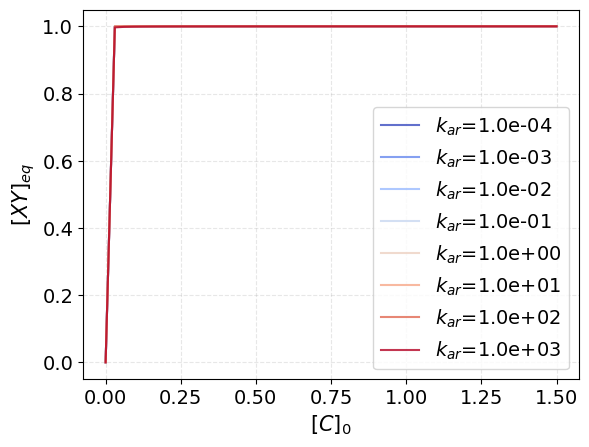

Parameters used for simulation:
Initial concentrations:
X_0=10
Y_0=10
k_a = 1; k_a_r = [1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
k_b= 1, k_b_r=0
# iterations = 100000000


In [13]:
# Reaction constants:
k = [1,0,1,0] # len(k)= # de reacciones
# Volume:
V = 10
initial_food = [0,10,10]+ [0]*2 # initial molecules number
initial_c = (np.linspace(0,15,50))
k_var = np.logspace(-4, 3, 8)
n_iterations = 100000000

xyeq_vs_c_ar(initial_c, initial_food, method, n_iterations, reactions,
           k, V, k_var)

print(f"Parameters used for simulation:\n\
Initial concentrations:\nX_0={initial_food[1]}\nY_0={initial_food[2]}\n\
k_a = {k[0]}; k_a_r = {k_var}\n\
k_b= {k[2]}, k_b_r={k[3]}\n\
# iterations = {n_iterations}")

Parameters used for simulation:
    Initial abundances:
X_0=10
Y_0=10
    C_0=1
    k_a = 1; k_a_r = 1
    k_b= 1, k_b_r=0
    # iterations = 19000


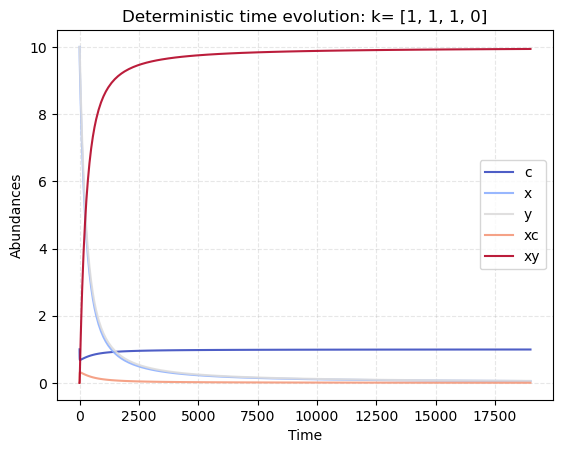

In [14]:
k = [1,1,1,0] # len(k)= # de reacciones
# Volume:
V = 10

# condiciones iniciales
initial_food = [1,10,10] + [0]*2# initial molecules number
n_iterations = 19000

time_evolution(method, n_iterations, reactions, initial_food,
               k, V)

## con k_br = 1

simulation completed for c = 0
simulation completed for c = 1
simulation completed for c = 2
simulation completed for c = 3
simulation completed for c = 4
simulation completed for c = 5
simulation completed for c = 6
simulation completed for c = 7
simulation completed for c = 8
simulation completed for c = 9
simulation completed for c = 10
simulation completed for c = 11
simulation completed for c = 12
simulation completed for c = 13
simulation completed for c = 14
simulation completed for c = 15
simulation completed for c = 16
simulation completed for c = 17
simulation completed for c = 18
simulation completed for c = 19
simulation completed for c = 20
simulation completed for c = 21
simulation completed for c = 22
simulation completed for c = 23
simulation completed for c = 24
simulation completed for c = 25
simulation completed for c = 26
simulation completed for c = 27
simulation completed for c = 28
simulation completed for c = 29
simulation completed for c = 30
simulation complet

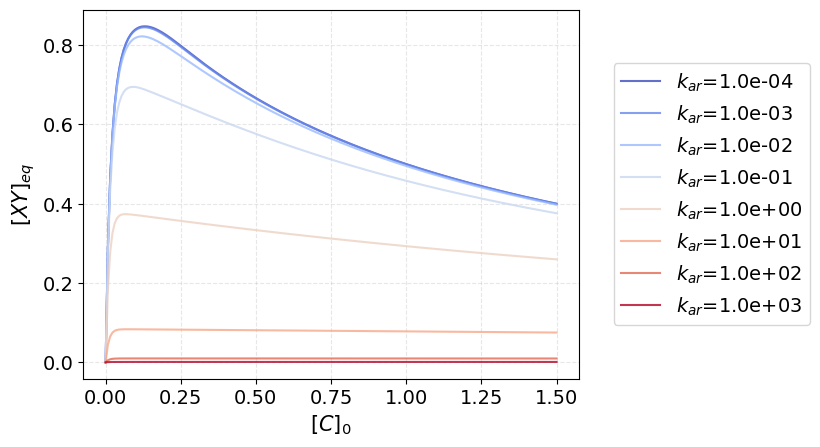

Parameters used for simulation:
Initial concentrations:
X_0=10
Y_0=10
k_a = 1; k_a_r = [1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
k_b= 1, k_b_r=1
# iterations = 1000


In [25]:
# Reaction constants:
k = [1,0,1,1] # len(k)= # de reacciones
# Volume:
V = 10
initial_food = [0,10,10] + [0]*2# initial molecules number
initial_c = (np.linspace(0,15,200))
k_var = np.logspace(-4, 3, 8)
n_iterations = 1000

xyeq_vs_c_ar(initial_c, initial_food, "Deterministic", n_iterations, reactions,
          k, V, k_var)

print(f"Parameters used for simulation:\n\
Initial concentrations:\nX_0={initial_food[1]}\nY_0={initial_food[2]}\n\
k_a = {k[0]}; k_a_r = {k_var}\n\
k_b= {k[2]}, k_b_r={k[3]}\n\
# iterations = {n_iterations}")

La probabilidad total es 0 !!
simulation completed for c = 0
simulation completed for c = 1
simulation completed for c = 2
simulation completed for c = 3
simulation completed for c = 4
simulation completed for c = 5
simulation completed for c = 6
simulation completed for c = 7
simulation completed for c = 8
simulation completed for c = 9
simulation completed for c = 10
simulation completed for c = 11
simulation completed for c = 12
simulation completed for c = 13
simulation completed for c = 14
simulation completed for c = 15
simulation completed for c = 16
simulation completed for c = 17
simulation completed for c = 18
simulation completed for c = 19
simulation completed for c = 20
simulation completed for c = 21
simulation completed for c = 22
simulation completed for c = 23
simulation completed for c = 24
simulation completed for c = 25
simulation completed for c = 26
simulation completed for c = 27
simulation completed for c = 28
simulation completed for c = 29
simulation completed

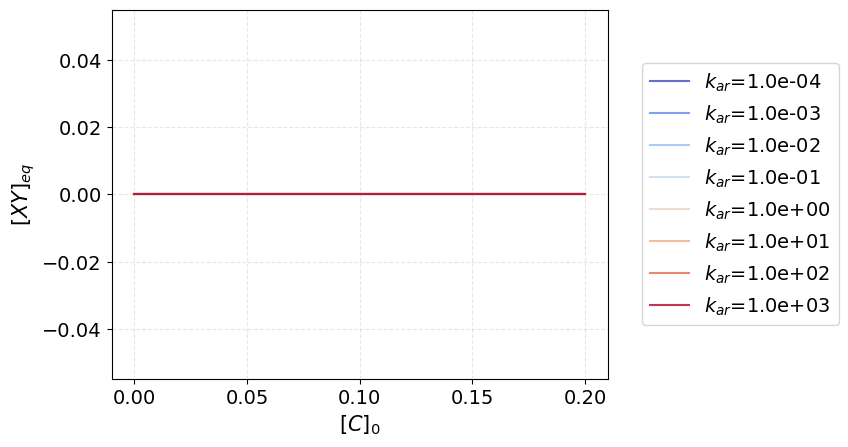

Parameters used for simulation:
Initial concentrations:
X_0=1
Y_0=1
k_a = 1; k_a_r = [1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
k_b= 1, k_b_r=1
# iterations = 100000000


In [26]:
# Reaction constants:
k = [1,0,1,1] # len(k)= # de reacciones
# Volume:
V = 10
initial_food = [0,1,1] + [0]*2# initial molecules number
initial_c = (np.linspace(0,2,100))
k_var = np.logspace(-4, 3, 8)
n_iterations = 100000000

xyeq_vs_c_ar(initial_c, initial_food, method, n_iterations, reactions,
          k, V, k_var)

print(f"Parameters used for simulation:\n\
Initial concentrations:\nX_0={initial_food[1]}\nY_0={initial_food[2]}\n\
k_a = {k[0]}; k_a_r = {k_var}\n\
k_b= {k[2]}, k_b_r={k[3]}\n\
# iterations = {n_iterations}")

Parameters used for simulation:
    Initial abundances:
X_0=10
Y_0=10
    C_0=0.001
    k_a = 1; k_a_r = 0.0001
    k_b= 1, k_b_r=1
    # iterations = 100000000


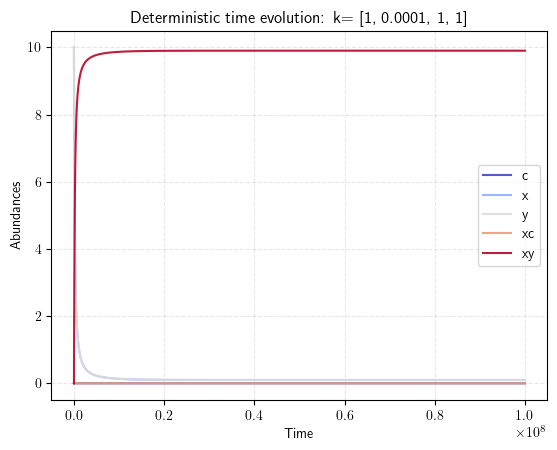

In [ ]:
# Reaction constants:
k = [1,1e-4,1,1] # len(k)= # de reacciones
# Volume:
V = 10
initial_food = [0.001,10,10] + [0]*2# initial molecules number
n_iterations = 100000000
time_evolution(method, n_iterations, reactions, initial_food,
                k, V)

simulation completed for c = 0
simulation completed for c = 1
simulation completed for c = 2
simulation completed for c = 3
simulation completed for c = 4
simulation completed for c = 5
simulation completed for c = 6
simulation completed for c = 7
simulation completed for c = 8
simulation completed for c = 9
simulation completed for c = 10
simulation completed for c = 11
simulation completed for c = 12
simulation completed for c = 13
simulation completed for c = 14
simulation completed for c = 15
simulation completed for c = 16
simulation completed for c = 17
simulation completed for c = 18
simulation completed for c = 19
simulation completed for c = 20
simulation completed for c = 21
simulation completed for c = 22
simulation completed for c = 23
simulation completed for c = 24
simulation completed for c = 25
simulation completed for c = 26
simulation completed for c = 27
simulation completed for c = 28
simulation completed for c = 29
simulation completed for c = 30
simulation complet

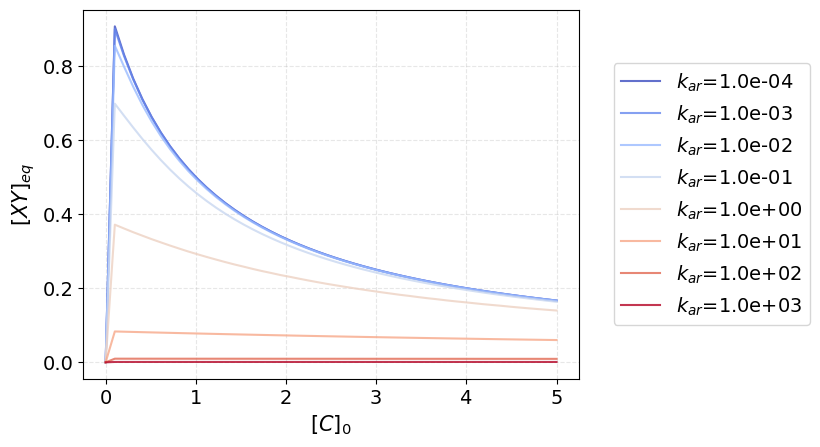

Parameters used for simulation:
Initial concentrations:
X_0=10
Y_0=10
k_a = 1; k_a_r = [1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
k_b= 1, k_b_r=1
# iterations = 1000000


In [14]:
# Reaction constants:
k = [1,0,1,1] # len(k)= # de reacciones
# Volume:
V = 10
initial_food = [0,10,10]+ [0]*2 # initial molecules number
initial_c = (np.linspace(0,50,50))
k_var = np.logspace(-4, 3, 8)
n_iterations = 1000000
method = "Deterministic"


xyeq_vs_c_ar(initial_c, initial_food, method, n_iterations, reactions,
          k, V, k_var)

print(f"Parameters used for simulation:\n\
Initial concentrations:\nX_0={initial_food[1]}\nY_0={initial_food[2]}\n\
k_a = {k[0]}; k_a_r = {k_var}\n\
k_b= {k[2]}, k_b_r={k[3]}\n\
# iterations = {n_iterations}")

## $k_{ar}$ Gillespie con $k_{br}=1$

In [23]:
k = [1,1,1,1] # len(k)= # de reacciones
# Volume:
V = 1000
initial_food = [0,1000,1000] + [0]*2 # initial molecules number
initial_c = np.round(np.linspace(1,250,20))
k_var = [1e-2,1]
n_iterations = 40000
method = "Gillespie"

xyeq_vs_c_ar(initial_c, initial_food,method, n_iterations, 
            reactions, k, V, k_var)

KeyboardInterrupt: 

Esta no nos convence mucho, así que vamos a comprobar la evolución para $[C]_0 = 0.001$ y $[C]_0= 0.01$ con $k_{ar}=1$

Parameters used for simulation:
    Initial abundances:
X_0=1000
Y_0=1000
    C_0=100
    k_a = 1; k_a_r = 0.001
    k_b= 1, k_b_r=1
    # iterations = 100000


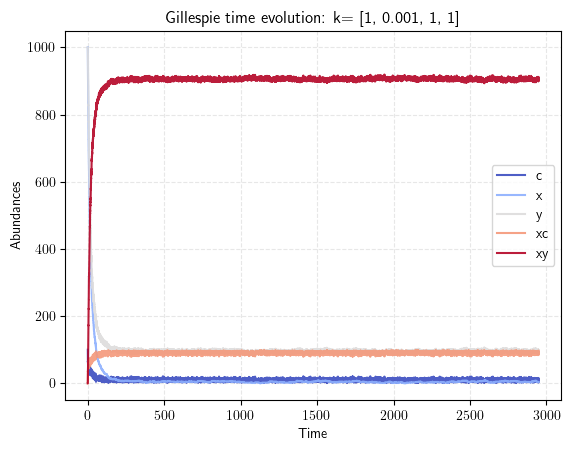

In [ ]:
# Reaction constants:
k = [1,1e-3,1,1] # len(k)= # de reacciones
# Volume:
V = 1000
initial_food = [100,1000,1000,0,0] # initial molecules number
initial_c = (np.linspace(0,15,50))
k_var = np.logspace(-4, 4, 6)
n_iterations = 100000
method = "Gillespie"
time_evolution(method, n_iterations, reactions, initial_food, k, V)

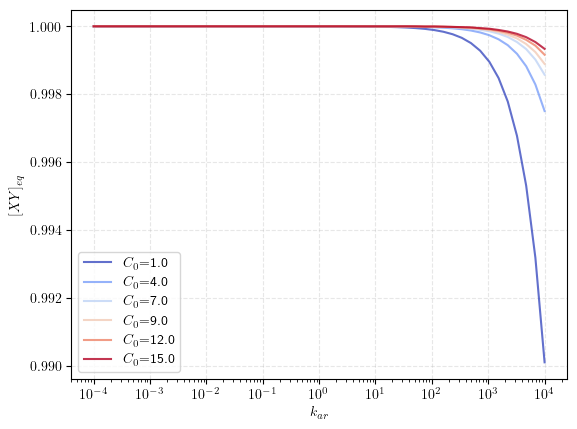

In [ ]:
# Reaction constants:
k = [1,0,1,0] # len(k)= # de reacciones
# Volume:
V = 10
initial_food = [0,10,10,0,0]

# Different values for initial C concentration and k_var:
initial_c = np.round(np.linspace(1,15,6))
k_var = np.logspace(-4, 4, 50)
n_iterations = 100000000
method = "Deterministic"

xyeq_vs_k_ar(initial_c, initial_food, method, 
             n_iterations, reactions, k, V, k_var)


## sale así porque a k muy alta no llega al equilibrio !!!

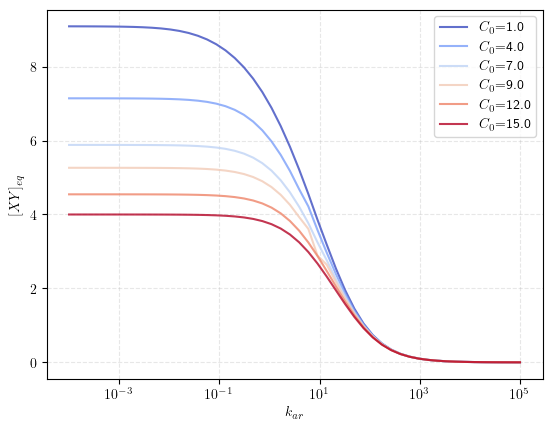

In [ ]:
# Reaction constants:
k = [1,0,1,1] # len(k)= # de reacciones
# Volume:
V = 1

# condiciones iniciales
initial_food = [0,10,10,0,0] # initial molecules number
food_molecules = 3

# Different values for initial C concentration and k_var:
initial_c = np.round(np.linspace(1,15,6))
k_var = np.logspace(-4, 5, 50)
n_iterations = 100000

xyeq_vs_k_ar(initial_c, initial_food, method, 
             n_iterations, reactions, k, V, k_var)

# Modificaciones en $k_{br}$

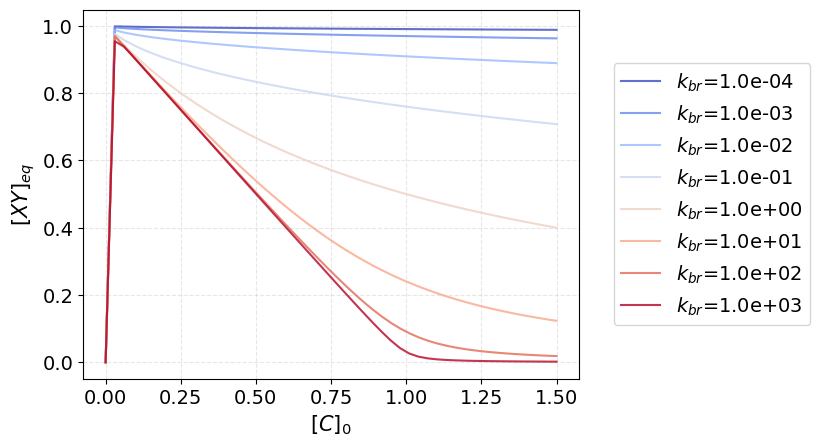

Parameters used for simulation:
Initial concentrations:
X_0=10
Y_0=10
k_a = 1; k_a_r = 0
k_b= 1, k_b_r=[1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
# iterations = 10000000


In [28]:
# Reaction constants:
k = [1,0,1,1] # len(k)= # de reacciones
# Volume:
V = 10
initial_food = [0,10,10,0,0] # initial molecules number
initial_c = (np.linspace(0,15,50))
k_var = np.logspace(-4, 3, 8)
n_iterations = 10000000

xyeq_vs_c_br(initial_c, initial_food, method, n_iterations, reactions,
          k, V, k_var)

print(f"Parameters used for simulation:\n\
Initial concentrations:\nX_0={initial_food[1]}\nY_0={initial_food[2]}\n\
k_a = {k[0]}; k_a_r = {k[1]}\n\
k_b= {k[2]}, k_b_r={k_var}\n\
# iterations = {n_iterations}")

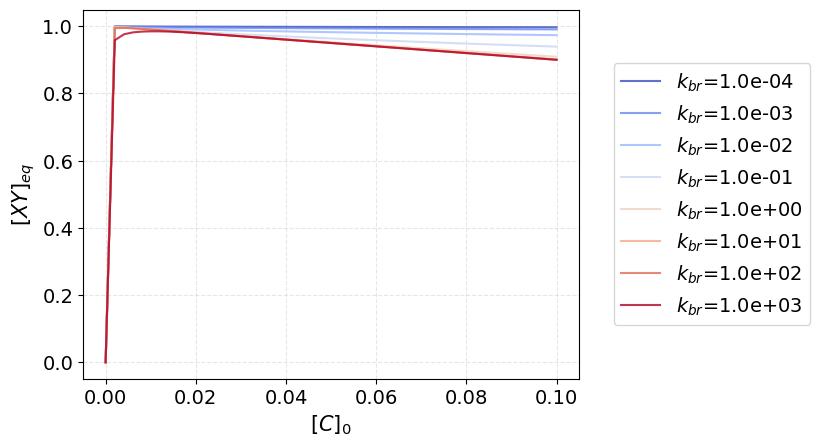

Parameters used for simulation:
Initial concentrations:
X_0=10
Y_0=10
k_a = 1; k_a_r = 0
k_b= 1, k_b_r=[1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
# iterations = 100000000


In [29]:
# Reaction constants:
k = [1,0,1,1] # len(k)= # de reacciones
# Volume:
V = 10
initial_food = [0,10,10,0,0] # initial molecules number
initial_c = (np.linspace(0,1,50))
k_var = np.logspace(-4, 3, 8)
n_iterations = 100000000
method = "Deterministic"

xyeq_vs_c_br(initial_c, initial_food, method, n_iterations, reactions,
          k, V, k_var)

print(f"Parameters used for simulation:\n\
Initial concentrations:\nX_0={initial_food[1]}\nY_0={initial_food[2]}\n\
k_a = {k[0]}; k_a_r = {k[1]}\n\
k_b= {k[2]}, k_b_r={k_var}\n\
# iterations = {n_iterations}")

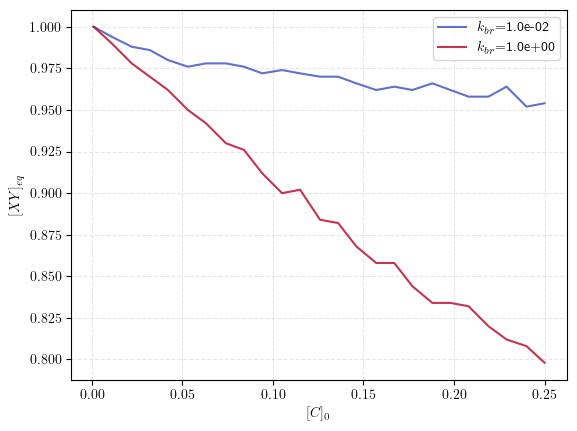

In [ ]:
k = [1,0,1,1] # len(k)= # de reacciones
# Volume:
V = 1000
initial_food = [0,1000,1000,0,0] # initial molecules number
initial_c = np.round(np.linspace(1,250,25))
k_var = [1e-2,1]
n_iterations = 20000
method = "Gillespie"

xyeq_vs_c_br(initial_c, initial_food,method, n_iterations, 
            reactions, k, V, k_var)

Parameters used for simulation:
    Initial abundances:
X_0=10
Y_0=10
    C_0=6
    k_a = 1; k_a_r = 0
    k_b= 1, k_b_r=1
    # iterations = 700


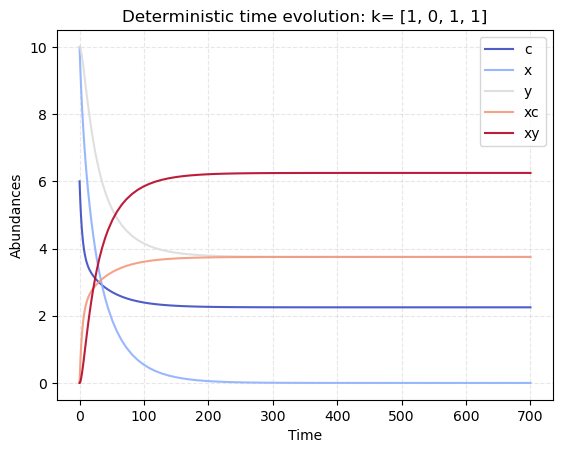

In [30]:
k = [1,0,1,1] # len(k)= # de reacciones
# Volume:
V = 10

# condiciones iniciales
initial_food = [6,10,10,0,0] # initial molecules number
food_molecules = 3
n_iterations = 700
method = "Deterministic"

time_evolution(method, n_iterations, reactions, initial_food,
               k, V)

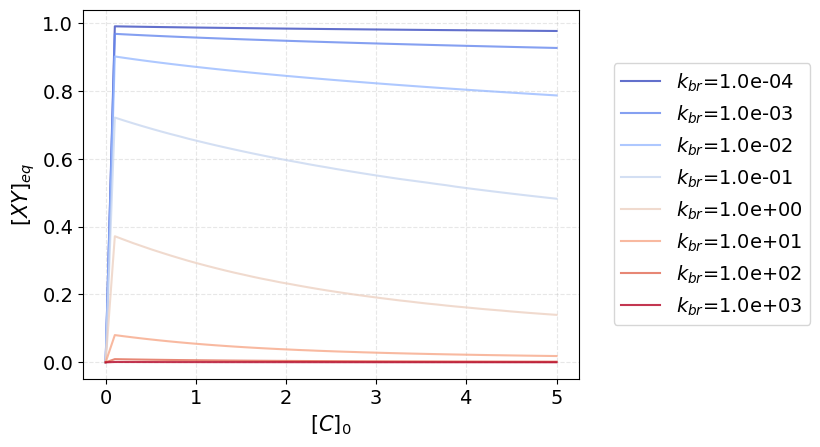

Parameters used for simulation:
Initial concentrations:
X_0=10
Y_0=10
k_a = 1; k_a_r = 1
k_b= 1, k_b_r=[1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
# iterations = 1000000


In [15]:
# Reaction constants:
k = [1,1,1,1] # len(k)= # de reacciones
# Volume:
V = 10
initial_food = [0,10,10,0,0] # initial molecules number
initial_c = (np.linspace(0,50,50))
k_var = np.logspace(-4, 3, 8)
n_iterations = 1000000

xyeq_vs_c_br(initial_c, initial_food, method, n_iterations, reactions,
          k, V, k_var)

print(f"Parameters used for simulation:\n\
Initial concentrations:\nX_0={initial_food[1]}\nY_0={initial_food[2]}\n\
k_a = {k[0]}; k_a_r = {k[1]}\n\
k_b= {k[2]}, k_b_r={k_var}\n\
# iterations = {n_iterations}")

Parameters used for simulation:
    Initial abundances:
X_0=10
Y_0=10
    C_0=4
    k_a = 1; k_a_r = 1
    k_b= 1, k_b_r=1
    # iterations = 500


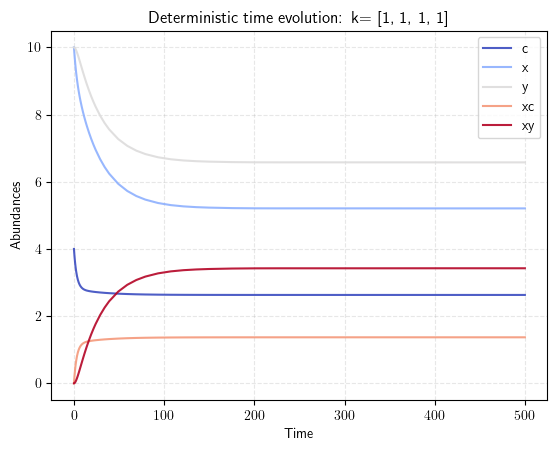

In [ ]:
k = [1,1,1,1] # len(k)= # de reacciones
# Volume:
V = 10

# condiciones iniciales
initial_food = [4,10,10,0,0] # initial molecules number
food_molecules = 3
n_iterations = 500

time_evolution(method, n_iterations, reactions, initial_food,
               k, V)

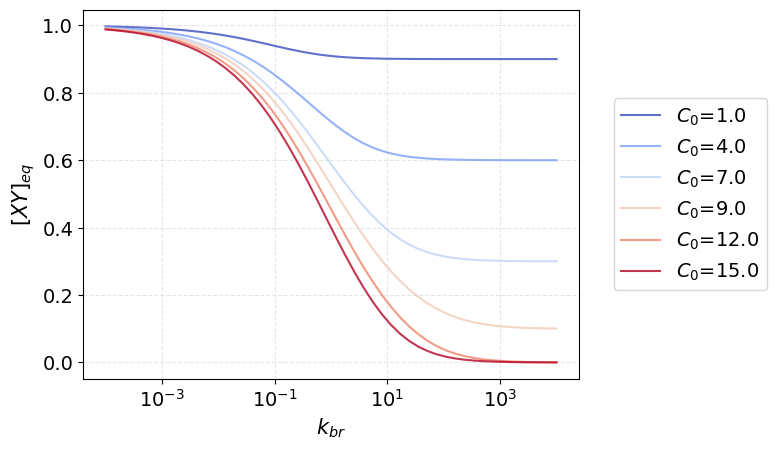

In [32]:
# Reaction constants:
k = [1,0,1,0] # len(k)= # de reacciones
# Volume:
V = 10
initial_food = [0,10,10,0,0]

# Different values for initial C concentration and k_var:
initial_c = np.round(np.linspace(1,15,6))
k_var = np.logspace(-4, 4, 50)
n_iterations = 1000000000

xyeq_vs_k_br(initial_c, initial_food, method, 
             n_iterations, reactions, k, V, k_var)

Parameters used for simulation:
    Initial abundances:
X_0=10
Y_0=10
    C_0=1
    k_a = 1; k_a_r = 0
    k_b= 1, k_b_r=10000.0
    # iterations = 1000000


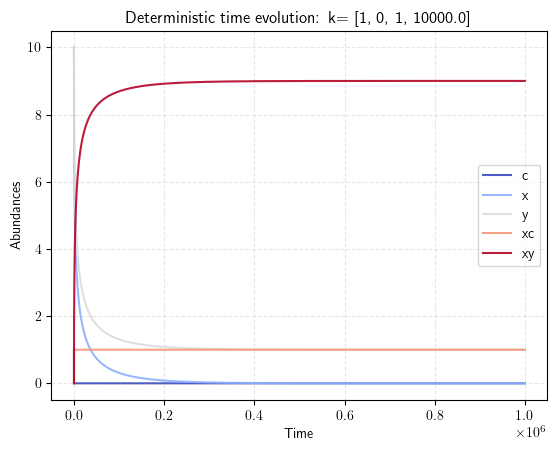

In [ ]:
k = [1,0,1,1e4] # len(k)= # de reacciones
# Volume:
V = 1

# condiciones iniciales
initial_food = [1,10,10,0,0] # initial molecules number
food_molecules = 3
n_iterations = 1000000

time_evolution(method, n_iterations, reactions, initial_food,
               k, V)

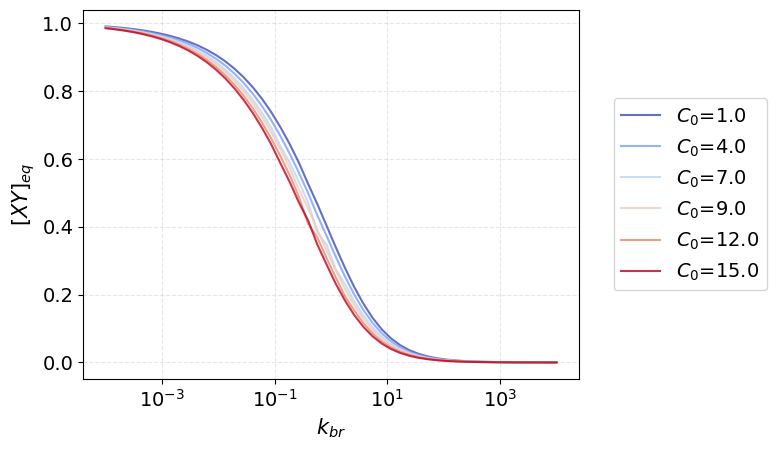

In [33]:
# Reaction constants:
k = [1,1,1,0] # len(k)= # de reacciones
# Volume:
V = 10
initial_food = [0,10,10,0,0]

# Different values for initial C concentration and k_var:
initial_c = np.round(np.linspace(1,15,6))
k_var = np.logspace(-4, 4, 50)
n_iterations = 100000000

xyeq_vs_k_br(initial_c, initial_food, method, 
             n_iterations, reactions, k, V, k_var)

Parameters used for simulation:
    Initial abundances:
X_0=10
Y_0=10
    C_0=1
    k_a = 1; k_a_r = 1
    k_b= 1, k_b_r=1
    # iterations = 1000


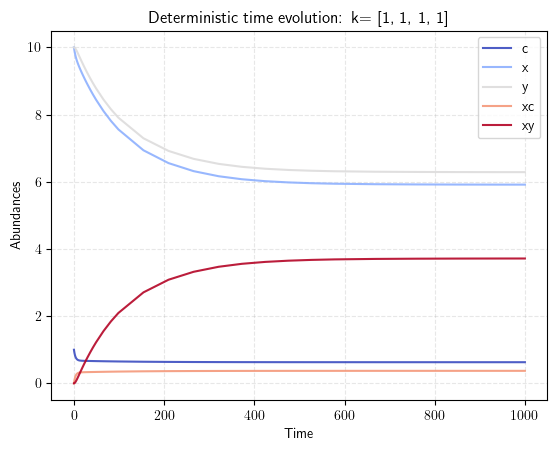

In [ ]:
k = [1,1,1,1] # len(k)= # de reacciones
# Volume:
V = 10

# condiciones iniciales
initial_food = [1,10,10,0,0] # initial molecules number
food_molecules = 3
n_iterations = 1000

time_evolution(method, n_iterations, reactions, initial_food,
               k, V)

Parameters used for simulation:
    Initial abundances:
X_0=1000
Y_0=1000
    C_0=200
    k_a = 1; k_a_r = 1
    k_b= 1, k_b_r=1
    # iterations = 10000


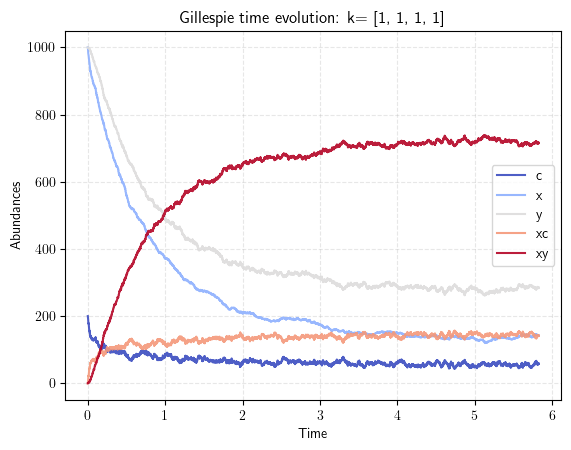

In [ ]:
k = [1,1,1,1] # len(k)= # de reacciones
# Volume:
V = 100
# condiciones iniciales
initial_food = [200,1000,1000,0,0] # initial molecules number
food_molecules = 3
n_iterations = 10000
method = "Gillespie"

time_evolution(method, n_iterations, reactions, initial_food,
               k, V)